Name: Shankar AKM <br>
Email: akmshankar@gmail.com

### Case Study - Text Mining
**Bank review / Complaints Analysis**

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [14]:
# Import data analysis and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import text mining packages
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re, string, textblob
from textblob import TextBlob

# Import feature engineering packages
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
# settings 
color = sns.color_palette()
sns.set_style('dark')

In [6]:
# Load dataset
data = pd.read_excel('BankReviews.xlsx')

#### Exploratory data analysis

In [7]:
# View top 5 rows
data.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [8]:
print('No. of rows and columns: ', data.shape )

No. of rows and columns:  (505, 4)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [10]:
data['Stars'].unique()

array([5, 1], dtype=int64)

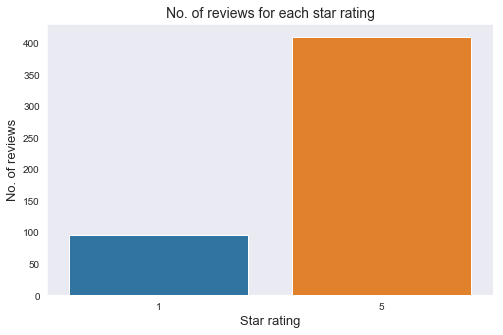

In [11]:
stars_count = data.groupby('Stars').count()
plt.figure(figsize = (8,5))
sns.barplot(stars_count.index.values, stars_count['Reviews'])
plt.xlabel('Star rating', fontsize = 13)
plt.ylabel('No. of reviews', fontsize = 13)
plt.title('No. of reviews for each star rating', fontsize = 14)
plt.show()

- Observations from exploratory analysis:
    - There are no missing/null values in the dataset
    - All variables are in appropropriate data types for the analysis

#### Data Processing

In [13]:
data.head(2)

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage


In [15]:
# Pre-process the text columns 'Reviews' and 'BankName'
# Preprocessing steps :  Conversion to lower case, removal of punctuations, removal of stopwords, lemmatization
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in str(text).lower().split() if word not in stop_words])
    punc_free = ''.join([char for char in stop_free if char not in punctuations])
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized

In [16]:
data['Reviews'] = data['Reviews'].apply(lambda x: clean(x))
data['BankName'] = data['BankName'].apply(lambda x: clean(x))

In [17]:
data.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,great job wyndham capital person professional ...,wyndham capital mortgage
1,2017-02-10,5,matthew richardson professional helpful helped...,wyndham capital mortgage
2,2017-08-21,5,past experience wyndham mortgage would without...,wyndham capital mortgage
3,2017-12-17,5,dealing brad thomka beginning started stressfu...,wyndham capital mortgage
4,2016-05-27,5,cant express grateful support zach provided fa...,wyndham capital mortgage


#### Identify key positive and negative words

- Approach:
    - Identify 20 most frequent words in Reviews
    - Categorise the words as positive or negative using vadersentiment

In [16]:
# Combine all reviews into a single object
all_review = []
for rev in range(data.shape[0]):
    all_review.append(data['Reviews'][rev])

In [18]:
all_review[0]

'great job wyndham capital person professional helped u move refinance process smoothly thank you'

In [19]:
# Split the reviews into individual words
all_words = str(all_review).split()

In [21]:
# Identify most frequent words
from collections import Counter
count = Counter(all_words)

In [26]:
print(count.most_common(30))

[('loan', 306), ('process', 245), ('would', 243), ('time', 216), ('u', 206), ('home', 190), ("read',", 185), ('mortgage', 150), ('recommend', 147), ('rate', 139), ('work', 136), ('closing', 132), ('great', 118), ('made', 117), ('team', 109), ('question', 108), ('service', 106), ('experience', 106), ('get', 98), ('nasb', 97), ('company', 95), ('best', 95), ('call', 92), ('week', 87), ('always', 86), ('email', 84), ('lender', 84), ('bank', 83), ('day', 79), ('customer', 78)]


In [28]:
# Find the sentiment of word using vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [48]:
pos_score = []
for word in count.most_common(5):
    pos_score.append(analyser.polarity_scores(word).get('neg'))

AttributeError: 'tuple' object has no attribute 'split'

In [12]:
type(all_reviews)

list

- Preprocessing includes
     - Conversion to lower characters
     - Removal of punctuations
     - Removal of stopwords
     - Lemmatization

In [13]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
lemma = WordNetLemmatizer()

In [14]:
def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop_words])
    punc_free = ''.join([char for char in stop_free if char not in punctuations])
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [15]:
doc_clean = [clean(doc).split() for doc in all_reviews]

In [16]:
print(doc_clean[0])

['great', 'job', 'wyndham', 'capital', 'person', 'professional', 'helped', 'u', 'move', 'refinance', 'process', 'smoothly', 'thank', 'you']


#### Key Positive and Negative words

In [68]:
# Positive words will be associated with reviews having star rating of 5 while Negative words will be associated with 1 Star.
# Take subset of data with star rating of 1 and 5

In [98]:
pos_review = []
neg_review = []

for i in range(data.shape[0]):
    if (data['Stars'][i]==5):
        pos_review.append(data['Reviews'][i])
for i in range(data.shape[0]):
    if (data['Stars'][i]==1):
        neg_review.append(data['Reviews'][i])
    

In [99]:
print(len(pos_review))
print(len(neg_review))

# Preprocess the text for analysis
pos_review = clean(str(pos_review))
neg_review = clean(str(neg_review))

410
95


In [100]:
# Frequent Negative words
from collections import Counter
counter_neg = Counter(str(neg_review).split())
print(counter_neg.most_common(10))

[('would', 123), ('loan', 115), ('bank', 67), ('closing', 66), ('rate', 60), ('week', 60), ('time', 59), ('read', 55), ('morern', 52), ('process', 49)]


In [101]:
# Frequent Positive words
counter_pos = Counter(str(pos_review).split())
print(counter_pos.most_common(10))

[('loan', 211), ('process', 199), ('home', 172), ('u', 161), ('time', 158), ('read', 134), ('morern', 134), ('recommend', 127), ('work', 124), ('would', 123)]


#### Key Positive and Negative words using Vadersentiment

In [102]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [106]:
analyser.polarity_scores('home').get('neg')

0.0

In [107]:
len(neg_review.split())

6783

#### Classification of reviews into positive, negative and neutral

In [108]:
# Classify review as per below crietria
#   Negative : sentiment_score < -0.05
#   Neutral  : sentiment_score <-0.05 and > 0.05
#   Positive : sentiment_score > 0.05

In [114]:
data['Processed_reviews'] = data['Reviews'].apply(lambda x: clean(x))

In [115]:
data['sentiment_score'] = data['Processed_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [116]:
data['sentiment'] = np.where(data['sentiment_score'] < -0.05, 'Negative', 
                             np.where(data['sentiment_score'] < 0.05, 'Neutral', 'Positive'))

In [119]:
data.head()

,Date,Stars,Reviews,BankName,sentiment_score,sentiment,Processed_reviews
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,0.433333,Positive,great job wyndham capital person professional ...
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,0.550000,Positive,matthew richardson professional helpful helped...
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,-0.033869,Neutral,past experience wyndham mortgage would without...
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,0.086561,Positive,dealing brad thomka beginning started stressfu...
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,0.086667,Positive,cant express grateful support zach provided fa...


#### Identify key themes of problems (using clustering, topic modeling)
- We can identify the problems in the reviews with rating '1'.

In [163]:
# Take a subset of dataframe with star rating as 1
data_1 = data[data['Stars']==1]

In [168]:
data_1.head(2)

,Date,Stars,Reviews,BankName,sentiment_score,sentiment,processes_review
17,2017-02-24,1,This was the worst experience ever. It was lik...,Wyndham Capital Mortgage,-0.095455,Negative,worst experience ever like never gone process ...
18,2016-03-14,1,"A good rate but a very frustrating process, co...",Wyndham Capital Mortgage,0.142857,Positive,good rate frustrating process constant delays ...


In [169]:
# Drop columns which are not needed for analysis
data_1.drop(columns= ['Date', 'Reviews', 'BankName', 'sentiment_score', 'sentiment'], inplace=True)

C:\Users\1023457\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [170]:
data_1.head()

,Stars,processes_review
17,1,worst experience ever like never gone process ...
18,1,good rate frustrating process constant delays ...
19,1,upfront learn mistake trusted loan officer zer...
20,1,initially mortgage broker friendly assertive p...
21,1,initially mortgage broker friendly assertive p...


#### Using KMeans clustering

In [171]:
# Import clustering and vectorizer packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

# Create vectors of processed reviews
vectorizer = TfidfVectorizer()
x_data = vectorizer.fit_transform(data_1['processes_review'])

In [193]:
# Select the number of clusters using SC Score
# Calculate SC Score for k = 3 through 14
k_range = range(3, 14)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, random_state=12)
    km.fit(x_data)
    scores.append(metrics.silhouette_score(x_data, km.labels_))


In [194]:
print(scores)

[0.024335610249235133, 0.033674455850917974, 0.04340929208316082, 0.05990058277770113, 0.08608008823926475, 0.09972036050577213, 0.10477603827946019, 0.11811685137468272, 0.12338604302755538, 0.13762354182286873, 0.14647409375012138]


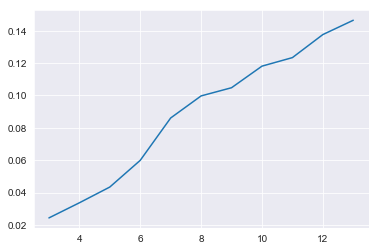

In [195]:
# Plot the SC Scores
plt.plot(k_range, scores)
plt.grid(True)
plt.show()

In [196]:
# Cluster the reviews into 8 segments
cluster_reviews = KMeans(n_clusters=8, init='k-means++', max_iter=100, n_init=1)
cluster_reviews.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [197]:
# print top 5 terms per cluster
order_centroids = cluster_reviews.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(8):
    print('Cluster: ', i)
    for ind in order_centroids[i, :5]:
        print(terms[ind])
    print('\n')

Cluster:  0
company
mistake
time
would
refinance


Cluster:  1
poor
us
questioned
committed
expired


Cluster:  2
closing
us
lender
contacted
site


Cluster:  3
saying
phone
tree
lending
rep


Cluster:  4
purchase
information
get
screwed
accepted


Cluster:  5
response
nick
called
emailed
due


Cluster:  6
bank
would
closing
process
loan


Cluster:  7
explain
point
interest
higher
apr




#### Using LDA topic modeling

In [214]:
data.head()

,Date,Stars,Reviews,BankName,sentiment_score,sentiment,processes_review
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,0.433333,Positive,great job wyndham capital person professional ...
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,0.550000,Positive,matthew richardson professional helpful helped...
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,-0.033869,Neutral,past experience wyndham mortgage would without...
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,0.061238,Positive,dealing brad thomka beginning started stressfu...
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,0.086667,Positive,cant express grateful support zach provided fa...


#### Data preprocessing

In [215]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
lemma = WordNetLemmatizer()

In [216]:
def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop_words])
    punc_free = ''.join([ch for ch in stop_free if ch not in punctuations])
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [217]:
doc_clean = [clean(doc).split() for doc in all_docs]

In [220]:
print(doc_clean[0])

['great', 'job', 'wyndham', 'capital', 'person', 'professional', 'helped', 'u', 'move', 'refinance', 'process', 'smoothly', 'thank']


In [205]:
# Prepare documents
all_docs = []
for i in range(data_1.shape[0]):
    all_docs.append(data.processes_review[i])

In [221]:
# Prepare document term matrix
# Import gensim
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)

In [228]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [227]:
# LDA Model
# Create an object for LDA model and train it on doc term matrix
# Gensim module allows both LDA model estimation from a training corpus and inference of topic distribution on new docs

In [230]:
lda = gensim.models.ldamodel.LdaModel
lda_model = lda(doc_term_matrix, num_topics = 5, id2word = dictionary, passes = 50)

In [234]:
# Result
print(lda_model.print_topics(num_topics = 2, num_words = 5))

[(1, '0.022*"nasb" + 0.018*"home" + 0.015*"time" + 0.012*"closing" + 0.011*"process"'), (2, '0.016*"loan" + 0.015*"process" + 0.014*"u" + 0.013*"wyndham" + 0.011*"would"')]


#### LDA - Kaggle

In [235]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online',random_state=12, learning_offset=50.)

In [243]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
dtm = vector.fit_transform(all_docs)

In [245]:
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=12, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [248]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [249]:
n_top_words = 10
print("\nTopics in LDA model: ")
tf_feature_names = vector.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:us process would home loan recommend time work professional mortgage

Topic #1:response nick going even called easy refi better looking want

Topic #2:pay would late told get fee teddy done gets represents

Topic #3:call get closing took broker loan back mortgage paper would

Topic #4:loan bank would us made weeks time closing get nasb


#### Old code starts

### Old code starts

In [36]:
data['Stars'].value_counts()

5    410
1     95
Name: Stars, dtype: int64

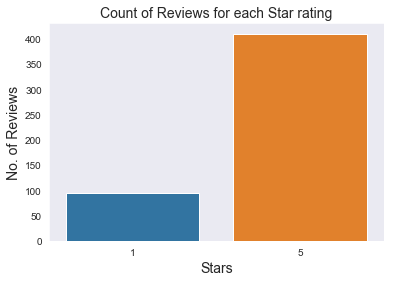

In [42]:
stars_count = data.groupby(['Stars']).count()
sns.barplot(stars_count.index, stars_count['Reviews'])
plt.xlabel('Stars', fontsize = 14)
plt.ylabel('No. of Reviews', fontsize = 14)
plt.title('Count of Reviews for each Star rating', fontsize=14)
plt.show()

#### Generate Document Term Matrix using CountVectorizer

In [43]:
# tokenize to remove unwanted elements from the data such as symbols, and numbers
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
c_vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
text_count = c_vect.fit_transform(data['Reviews'])

In [62]:
# Split the data into train and test for CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_count, data['Stars'], test_size = 0.3, random_state=1234)

In [63]:
# Model building and evaluation

In [64]:
from sklearn.naive_bayes import MultinomialNB
model_cv = MultinomialNB().fit(x_train, y_train)

In [65]:
y_pred = model_cv.predict(x_test)

In [66]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9605263157894737


In [55]:
# We got 96.05% accuracy using CountVector / BOW. 
# Try TF-IDF method to further improve the accuracy

#### Feature Generation using TF-IDF

In [67]:
# TF-IDF normalizes the document term matrix. It is the product of TF and IDF. 
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Reviews'])

In [68]:
# Split the data into train and test for TF-IDF
x_train, x_test, y_train, y_test = train_test_split(text_tf, data['Stars'], test_size = 0.3, random_state=1234)

In [69]:
# Model building and evaluation
model_tf = MultinomialNB().fit(x_train,y_train)
y_pred_tf = model_tf.predict(x_test)

In [70]:
print('Accuracy using TF-IDF : ', metrics.accuracy_score(y_test, y_pred_tf))

Accuracy using TF-IDF :  0.7894736842105263


In [12]:
# Define x and y variables
x = data['Reviews']
y = data['Stars']

In [13]:
# Split the dataframe into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(data.shape)

(353,)
(152,)
(353,)
(152,)
(505, 5)


In [14]:
# Build a utility function for test processing (Abbreviations and words correction)
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer  

In [15]:
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return text

In [16]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'wouldn', "wouldn't", 'won', 'can', 'or', 'been', 'too', 'hadn', 'into', 'all', 'if', 'herself', 'your', 'o', "mightn't", 'an', 'haven', "it's", 'itself', 'ourselves', 'she', 'y', 'yours', 're', 'until', "you'll", 'this', 'some', 'who', 'doesn', 'so', 'does', 'off', "you'd", 'has', 'wasn', 'him', 'is', 'such', 'again', 'hasn', 'here', 'were', 'should', 'not', 'with', 'couldn', 'weren', 'me', 'as', "hadn't", 'aren', 'our', 's', 'and', "shouldn't", 'her', "should've", 'other', 'very', "won't", 'under', 'd', 'more', 'will', 'because', 'just', 'theirs', "shan't", 'have', 'why', 'it', 'don', 'having', 'mustn', 'once', 'did', 'them', 'was', 'by', 'up', "needn't", 'further', "she's", 'they', 'now', "wasn't", 'mightn', 'are', 'do', 'same', 'needn', 've', 'their', 'a', "don't", 'from', 'out', 'ain', 'at', "haven't", 'above', 'hers', 'while', 'against', 'over', 'few', 't', 'ma', "you've", 'my', 'than', 'nor', 'you', "weren't", "isn't", 'myself', 'only', 'he', 'below', 'which', 'themselves', 'in

In [17]:
stemmer_func = nltk.stem.snowball.SnowballStemmer('english').stem

In [18]:
def pre_process(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
    return(text)

In [19]:
x_train.head()

102    \r\nI feel they made promises that they could ...
481    \r\nGreat bank with great products.  Easily th...
224    \r\ncan someone explain why the APR is more th...
101    \r\nWorst lending experience of my life. My po...
391    \r\nThey were very helpful. Any questions or c...
Name: Reviews, dtype: object

In [20]:
# Apply these text processing functions on the train and test data
x_train = x_train.apply(clean_text)
x_test = x_test.apply(clean_text)

In [21]:
x_train = pre_process(x_train)
x_test = pre_process(x_test)

In [22]:
x_train.head(2)

102    feel made promises could keep made mistakes pe...
481    great bank great products easily best bank ive...
Name: Reviews, dtype: object

In [23]:
# Vectorization 
from textblob import Word

In [24]:
# Train data
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1),encoding='latin-1')
xtrain_count = count_vect.fit_transform(x_train)

In [25]:
dtm = xtrain_count.toarray()

In [26]:
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
print(count_vect.get_feature_names())

['aaron', 'aarons', 'ability', 'able', 'absoltely', 'absolute', 'absolutely', 'accept', 'acceptable', 'accepted', 'accessible', 'accommodate', 'accommodating', 'accomplished', 'account', 'accountant', 'accurate', 'accusing', 'achieve', 'acquire', 'acquired', 'across', 'act', 'action', 'actual', 'actually', 'adam', 'adan', 'added', 'addedconsolidationit', 'addition', 'additional', 'address', 'addressed', 'addressresolve', 'adjust', 'adjusted', 'admin', 'admiration', 'advice', 'advised', 'advocated', 'afford', 'agai', 'age', 'agent', 'agents', 'aggravating', 'ago', 'agree', 'agreed', 'agreement', 'ahead', 'airfare', 'airline', 'alerted', 'alex', 'alievatied', 'alina', 'all', 'allow', 'allowed', 'almost', 'along', 'alpine', 'already', 'also', 'although', 'alves', 'always', 'amazing', 'amd', 'american', 'among', 'amortgage', 'amount', 'amounts', 'andd', 'andor', 'andrea', 'andrew', 'andy', 'angelica', 'ann', 'annoyed', 'annoying', 'another', 'answer', 'answered', 'answering', 'answers', 'a

In [28]:
dtm1 = pd.DataFrame(dtm)
dtm1.columns = count_vect.get_feature_names()

In [29]:
dtm1.head()

,aaron,aarons,ability,able,absoltely,absolute,absolutely,accept,acceptable,accepted,...,year,years,yelp,yes,yet,you,youi,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(x_test)

#tfidf_transformer = TfidfTransformer()
x_test_tfidf = tfidf_transformer.transform(xtest_count)

In [109]:
dtm2=pd.DataFrame(x_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [110]:
dtm2.head()

,aaron,aarons,ability,able,absoltely,absolute,absolutely,accept,acceptable,accepted,...,year,years,yelp,yep,yes,yet,you,zach,zelada,zero
0,0.0,0.0,0.0,0.106621,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.110909,0.0,0.0,...,0.0,0.075754,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.319378,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [111]:
#Topic Models as features

# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
x_topics = lda_model.fit_transform(x_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [112]:
# view the topic models
n_top_words = 50
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['apr docs higher explain check point fees someone interest send rate could closing consultant bob id total sent told repeatedly explanation faith day mentioned household driving power fly fedex unpacked coordinate consent four less weeksit goods blown guesswork expressing eliminated embark dread beautifully breeze guarantee broke reluctant ran attorney nc',
 'penny attitude whatever institution janel scott shawn firsttime transparent partner judgment maintained complex functionary humor concerned kidding truely accessible dunlop daniel worse corner joey kory pressured rushed opposite biggest klossner approximate calculate circumstances confirming types versus cons sense purposes encourage referrals pace unique fit lives inquiries glen salvador highy paths',
 'surprises guy good responsive brought hand congratulations written sending diligent absoltely touch skills aspects persistent effective work note taken clear ensure necessary personal leehy spoke everyone recommended adam beyond 

In [113]:
frequency_words_wo_stop= {}
for text in data['Reviews']:
    tokens = nltk.wordpunct_tokenize(text.lower())
    for token in tokens:
        if token.lower() not in stop_words:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1
                


In [114]:
frequency_words_wo_stop

{'great': 139,
 'job': 25,
 ',': 1135,
 'wyndham': 16,
 'capital': 12,
 '!': 222,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'us': 207,
 'move': 12,
 'refinance': 70,
 'process': 253,
 'smoothly': 15,
 '.': 1976,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 56,
 'find': 19,
 'correct': 1,
 'product': 10,
 'mortgage': 147,
 'much': 38,
 'excellent': 30,
 'service': 99,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 7,
 'use': 48,
 'needed': 29,
 '!!': 24,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 28,
 'wrong': 7,
 'encountered': 7,
 'servicer': 3,
 'dealing': 14,
 'previous': 13,
 'loan': 313,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 8,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 65,
 'recommend': 156,
 'brad': 7,
 'thomka': 3,
 'team': 113,
 'needs': 27,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 '&': 30,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'ti

In [115]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [117]:
# Naive Bayes on Count Vectors and TF-IDF
accuracy = train_model(naive_bayes.MultinomialNB(), x_train_tfidf, y_train, x_test_tfidf, y_test)
print("NB , Count Vectors: ", accuracy)



NB , Count Vectors:  0.8026315789473685


In [118]:
# Logistic regression on Count Vectors and TF-IDF
accuracy_lg = train_model(LogisticRegression(), x_train_tfidf, y_train, x_test_tfidf, y_test)
print("LR , Count Vectors: ", accuracy_lg)

LR , Count Vectors:  0.7960526315789473


In [119]:
# LinearSVC on Count Vectors and TF-IDF
accuracy_svc = train_model(svm.LinearSVC(), x_train_tfidf, y_train, x_test_tfidf, y_test)
print("LR , Count Vectors: ", accuracy_svc)



LR , Count Vectors:  0.9539473684210527


In [120]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()

In [121]:
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

In [122]:
print(x_test_dtm.shape)
print(x_train_dtm.shape)

(152, 2235)
(353, 2235)


In [124]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [125]:
# last 20 features
print(vect.get_feature_names()[-20:])

['wouldn', 'wouldnt', 'wow', 'write', 'writing', 'written', 'wrong', 'ws', 'wyndham', 'wyndum', 'year', 'years', 'yelp', 'yep', 'yes', 'yet', 'you', 'zach', 'zelada', 'zero']


In [126]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
x_train_dtm = vect.fit_transform(x_train)
x_train_dtm.shape

(353, 2235)

In [127]:
#Calculate tf-idf:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform(["New Year's Eve in New York",
                            "New Year's Eve in London",
                            "York is closer to London than to New York",
                            "London is closer to Bucharest than to New York"])

#Calculate cosine similarity:
cosine=(tfidf * tfidf.T).A
print(cosine)

[[1.         0.82384531 0.28730789 0.20464882]
 [0.82384531 1.         0.16511247 0.1679379 ]
 [0.28730789 0.16511247 1.         0.89268279]
 [0.20464882 0.1679379  0.89268279 1.        ]]


In [130]:
from sklearn.naive_bayes import MultinomialNB

In [131]:
#### Predicting the Star rating
# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(x_train_dtm, y_train)
y_pred_class = nb.predict(x_test_dtm)

# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.9736842105263158


In [132]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [133]:
# Sentiment

In [135]:
review = data['Reviews'][0]

In [137]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [138]:
data.head()

,Date,Stars,Reviews,BankName,sentiment
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,0.533333
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,0.453333
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,-0.033231
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,0.093740
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,0.125000


### Old code starts

In [9]:
print(data.info())
print('- '*50)
print('No. of missing values: ',data.isnull().any().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB
None
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
No. of missing values:  0


#### From above information we observe that,
- There are no null values
- All variables are in appropriate data types

#### Lowercase conversion
- Convert the reviews text into lowercase

In [10]:
data['Reviews'] = data['Reviews'].apply(lambda x : x.lower())

In [11]:
data.head(2)

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"great job, wyndham capital! each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,matthew richardson is professional and helpful...,Wyndham Capital Mortgage


#### Tokenization
- Tokenization is the process of breaking down a text paragraph into smaller chunks such as words or sentence. Token is a single entity that is building blocks for sentence or paragraph.

In [12]:
# Word tokenization
from nltk.tokenize import word_tokenize
data['token_review'] = data['Reviews'].apply(lambda x : word_tokenize(x))

#### Remove punctuation

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
for i in range(505):
    for word in data['token_review'][i]:
        if word in string.punctuation:
            data['token_review'][i].remove(word)
    

In [15]:
data.head(2)

,Date,Stars,Reviews,BankName,token_review
0,2017-04-10,5,"great job, wyndham capital! each person was pr...",Wyndham Capital Mortgage,"[great, job, wyndham, capital, each, person, w..."
1,2017-02-10,5,matthew richardson is professional and helpful...,Wyndham Capital Mortgage,"[matthew, richardson, is, professional, and, h..."


#### Remove stopwords

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [17]:
print(stop_words)

{'did', 'a', 'because', 'by', 'd', "you've", 'more', 'down', 'needn', 'didn', 'wasn', 'these', 'we', 'hers', 'all', 'when', 'same', "you're", 'its', 'off', 'hadn', 'had', 'my', "hadn't", "isn't", 'having', 'yourselves', 'wouldn', 'over', 'why', 'himself', "mustn't", 'yourself', "that'll", 'who', 'below', 'again', "wouldn't", 'have', 'while', 'his', 'herself', 'which', 'into', 'nor', 'm', "weren't", 'so', "don't", 'most', 'our', 't', "should've", 'mightn', 're', 'each', 'mustn', 'yours', 'how', 'are', 'further', 'couldn', 'will', 'up', 'through', 'itself', "needn't", 'shan', 'o', 'very', 'shouldn', "you'd", 'should', 'haven', 'being', 'whom', 'those', 'aren', 'than', "aren't", 'hasn', 'him', 'in', 'll', 'no', 'during', 'you', 's', "shan't", 'at', "hasn't", 'own', 'and', 'of', 'y', 'any', 'few', "mightn't", "it's", 'if', 'that', 'then', 'myself', 'for', 'be', 'here', 'some', 'out', 'too', 'with', "haven't", "shouldn't", 'the', 'themselves', 'but', 'was', 'am', 'can', 'until', 'her', 'wha

In [18]:
for i in range(505):
    for word in data['token_review'][i]:
        if word in stop_words:
            data['token_review'][i].remove(word)

In [19]:
data.head()

,Date,Stars,Reviews,BankName,token_review
0,2017-04-10,5,"great job, wyndham capital! each person was pr...",Wyndham Capital Mortgage,"[great, job, wyndham, capital, person, profess..."
1,2017-02-10,5,matthew richardson is professional and helpful...,Wyndham Capital Mortgage,"[matthew, richardson, professional, helpful, h..."
2,2017-08-21,5,we had a past experience with wyndham mortgage...,Wyndham Capital Mortgage,"[had, past, experience, wyndham, mortgage, wou..."
3,2017-12-17,5,we have been dealing with brad thomka from the...,Wyndham Capital Mortgage,"[have, dealing, brad, thomka, beginning, what,..."
4,2016-05-27,5,i can't express how grateful i am for the supp...,Wyndham Capital Mortgage,"[ca, n't, express, grateful, am, support, zach..."


### Old code starts

#### Sentiment Analysis

In [207]:
data['Stars'].value_counts()

5    410
1     95
Name: Stars, dtype: int64

In [208]:
# Our data is predominantly positively rated

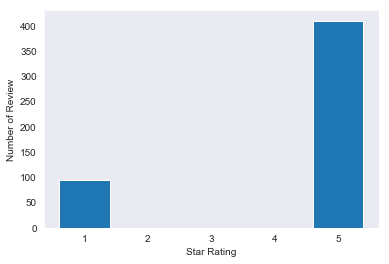

In [212]:
stars_count = data.groupby('Stars').count()
plt.bar(stars_count.index.values, stars_count['Reviews'])
plt.xlabel('Star Rating')
plt.ylabel('Number of Review')
plt.show()

In [213]:
# Feature generation using Bag of Words
# We have a set of reviews and their Star ratings. 
# Bag of Words (BoW) converts text into matrix of occurence of words within a document, 
# Create a document term matrix using CountVectorizer

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [226]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Reviews'])

In [227]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(text_counts, data['Stars'], test_size=0.3, random_state = 1234)

In [236]:
text_counts.shape

(505, 2453)

#### Model building and evaluation

In [237]:
# Build a text classification model using TF-IDF
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [238]:
clf = MultinomialNB().fit(train_x, train_y)

In [239]:
type(clf)

sklearn.naive_bayes.MultinomialNB

In [240]:
predicted = clf.predict(test_x)

In [241]:
print("MultinomialNB Accuracy:" , metrics.accuracy_score(test_y, predicted))

MultinomialNB Accuracy: 0.9605263157894737


#### Predicting Star rating for a given review

#### Frequency Distribution

In [66]:
from nltk.probability import FreqDist

In [114]:
all_review = ''
for i in range(data.shape[0]):
    all_review = all_review + data['Reviews'][i]
type(all_review)

str

In [115]:
# Now tokenize all_review
all_review_token = word_tokenize(all_review)
fdist = FreqDist(all_review_token)
print(fdist)

<FreqDist with 2818 samples and 43220 outcomes>


In [116]:
# 10 Most frequent words
print(fdist.most_common(10))

[('.', 1977), ('and', 1537), ('the', 1410), ('to', 1248), (',', 1151), ('i', 1149), ('was', 838), ('a', 829), ('with', 677), ('of', 504)]


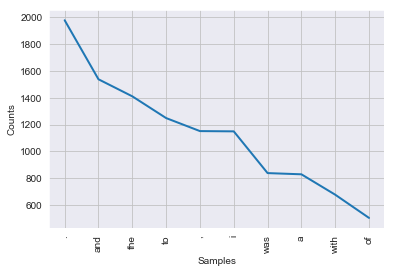

In [117]:
fdist.plot(10,cumulative=False)
plt.show()

### Old code starts

#### Univariate Analysis

In [70]:
data['Stars'].unique()

array([5, 1], dtype=int64)

In [71]:
# From above, we observe that the data has Star ratings of only '1' and '5'

505
440.33861386138614
2954
15


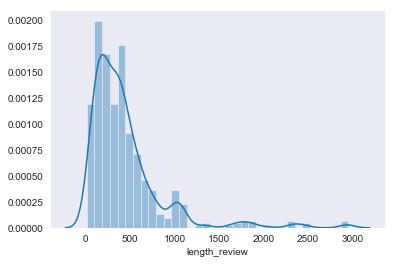

In [72]:
print(data['length_review'].count())
print(data['length_review'].mean())
print(data['length_review'].max())
print(data['length_review'].min())
sns.distplot(data['length_review'])
plt.show()

#### Bivariate Analysis

In [73]:
# Using visualization, identify if length of the reviews has any relationship with the Stars

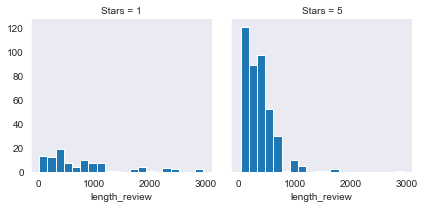

In [74]:
g = sns.FacetGrid(data=data, col='Stars')
g.map(plt.hist, 'length_review', bins = 20)
plt.show()

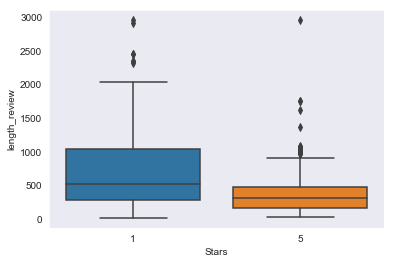

In [75]:
sns.boxplot(x='Stars', y='length_review', data=data)
plt.show()

In [76]:
# From above, we observe that
# mean length of review is lower for 5 stars compared to 1 star

In [77]:
# lets group the data by the star rating and find correlation between features
stars = data.groupby(['Stars']).mean()

In [78]:
stars

,length_review
Stars,
1,776.968421
5,362.339024


In [79]:
# Lets create the x and y variable for our classification task.
# x : reviews
# y : stars

In [80]:
data.columns

Index(['Date', 'Stars', 'Reviews', 'BankName', 'length_review'], dtype='object')

In [81]:
x = data['Reviews']
y = data['Stars']

#### Vectorisation

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(x)

In [89]:
len(bow_transformer.vocabulary_)

2916

In [90]:
# Illustration
review_25 = x[24] 
review_25

'Expert loan officer, well versed in VA and the financial impacts of loan component changes. The best I have worked with across 7 home buying/selling deals. Now advocated for by the #1 real estate broker in the state due to his ability to close complicated and high pressure deals. She places him at the top of the list after 32 years in the business! Professionally and patiently answers detailed questions and can rally the expanded NASB team (also stellar!) to support your needs. He handled my complicated VA loan that seemed to change every week while we tried to buy an Antebellum home (tough comps) during my retirement from the military (tough income verification) with five families all swapping homes (tons of contingencies). Everything along the way mattered and Aaron and the NASB team got it done (even on weekends) and closed on time with the best interest rate in the market and no added origination fees. Look, do NOT pass up an opportunity to work with him.\xa0'

In [91]:
bow_25 = bow_transformer.transform([review_25])

In [92]:
bow_25.shape

(1, 2916)

In [93]:
bow_transformer.get_feature_names()[1000]

'clients'

In [95]:
#print(bow_25)
#print(bow_25.shape)
#445
print(bow_transformer.get_feature_names()[678])

acceptable


In [96]:
# Now, transform the x dataframe into sparse matrix
x = bow_transformer.transform(x)

In [97]:
print('Shape of Sparse Matrix: ', x.shape)
print('No. of non-zero occurences: ',x.nnz)

Shape of Sparse Matrix:  (505, 2916)
No. of non-zero occurences:  17078


In [98]:
# Percentage of non-zero values
density = (100.0*x.nnz/(x.shape[0]*x.shape[1]))
print('Density: {}'.format((density)))

Density: 1.159733257276345


In [100]:
# Reviews are processed now. Split the data into train and test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=1234)

In [101]:
# Training the model
# Lets use multinomial naive bayes to fit the training set
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_x, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [102]:
# Test and evaluate the model
pred = nb.predict(test_x)

In [103]:
# Lets evaluate the predictions against the actual ratings using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

In [104]:
print(confusion_matrix(test_y, pred))

[[ 31   1]
 [  2 118]]


In [105]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           1       0.94      0.97      0.95        32
           5       0.99      0.98      0.99       120

   micro avg       0.98      0.98      0.98       152
   macro avg       0.97      0.98      0.97       152
weighted avg       0.98      0.98      0.98       152



In [62]:
# Our model has achieved 92% accuracy!